<a href="https://colab.research.google.com/github/Divyansh1414/Quantum-Exploration/blob/main/qiskit_bell_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing dependencies
!pip install --upgrade qiskit qiskit-aer matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


# Bell State Generation & Visualization with Qiskit


Phi_plus statevector:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Phi_plus counts: {'11': 529, '00': 495}


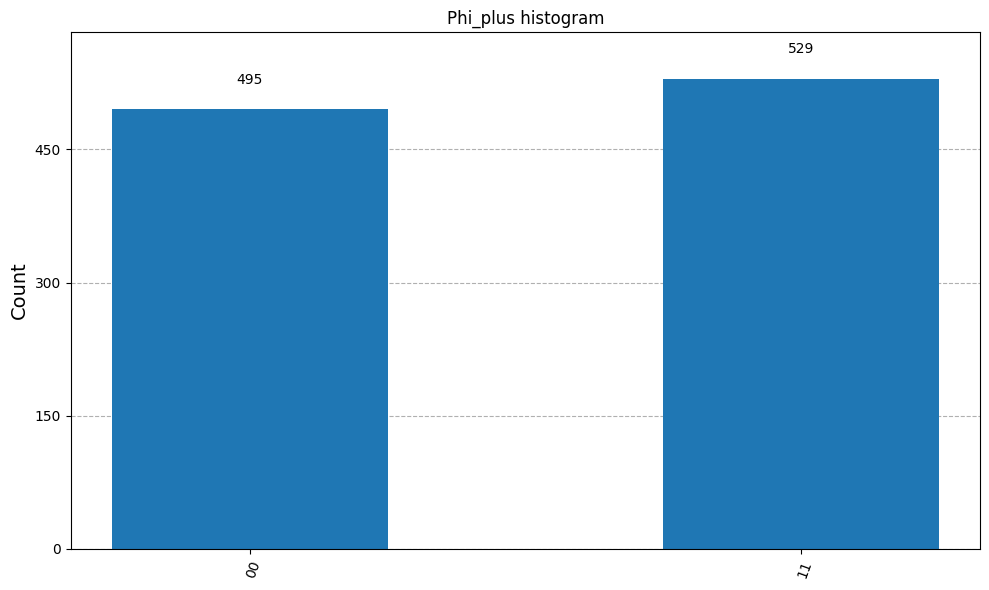


Psi_plus statevector:
 Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Psi_plus counts: {'10': 517, '01': 507}


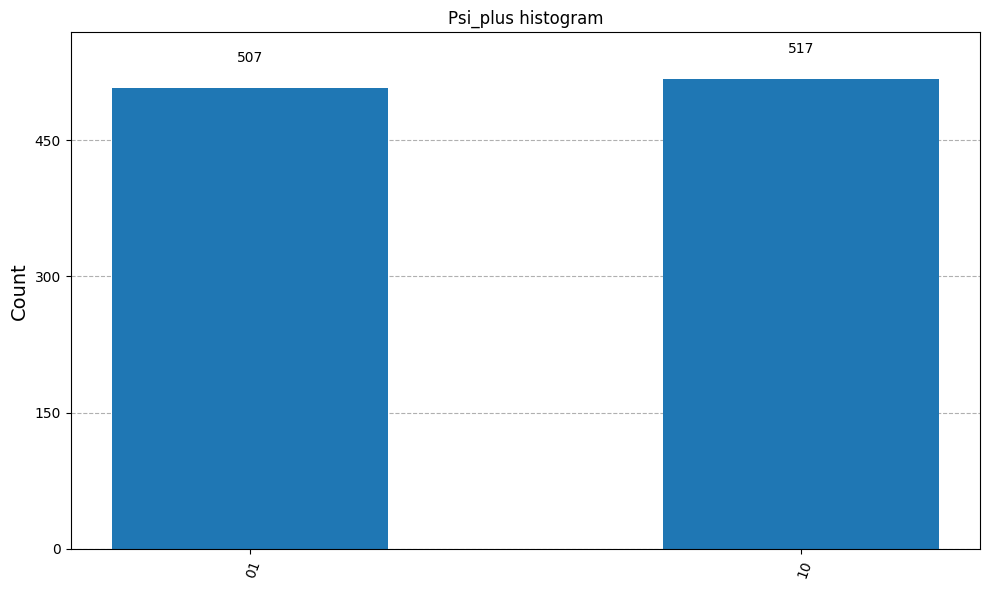


Phi_minus statevector:
 Statevector([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))
Phi_minus counts: {'00': 502, '11': 522}


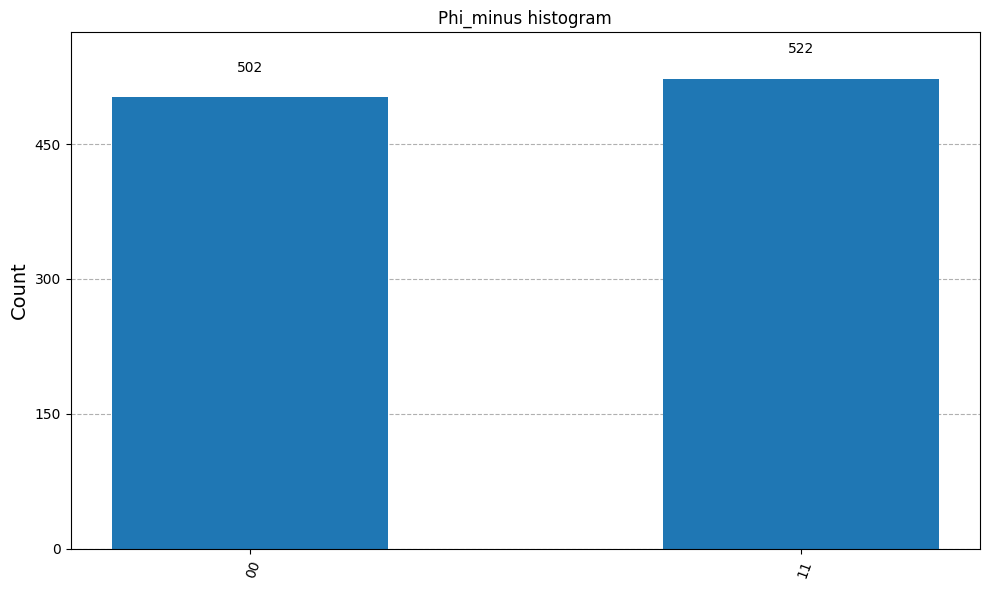


Psi_minus statevector:
 Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
             -0.        +0.j],
            dims=(2, 2))
Psi_minus counts: {'01': 534, '10': 490}


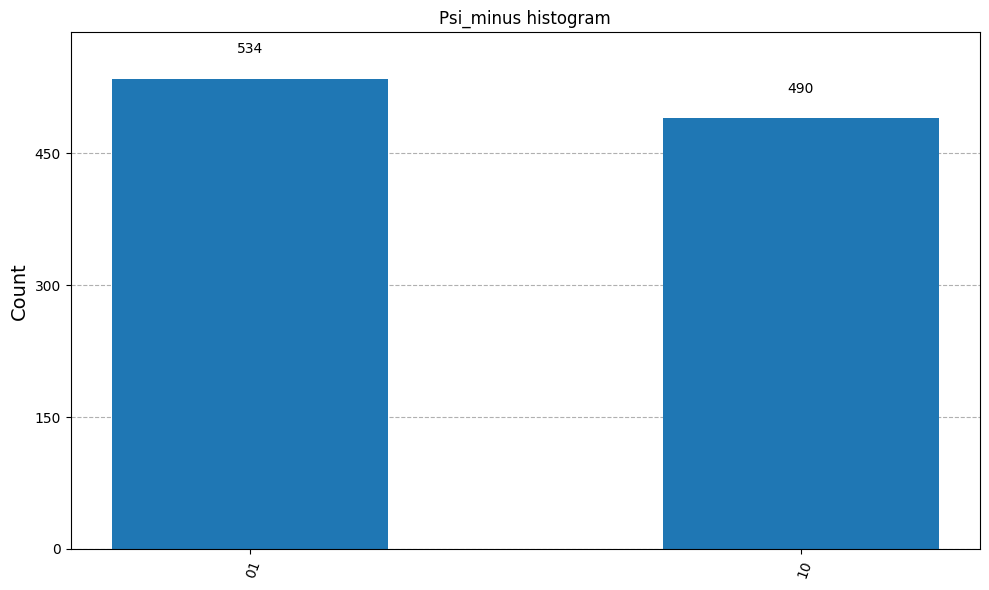

In [64]:
from IPython import get_ipython
from IPython.display import display


%matplotlib inline

from qiskit import QuantumCircuit
import qiskit_aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create simulators
state_sim = AerSimulator(method='statevector')
qasm_sim  = AerSimulator(method='automatic')

def execute_bell(qc_sv, qc_qasm, name):
    # Statevector run
    # Adding the instruction to save the statevector
    qc_sv_with_save = qc_sv.copy()
    qc_sv_with_save.save_statevector()
    sv_result = state_sim.run(qc_sv_with_save).result()
    sv = sv_result.get_statevector()
    print(f"\n{name} statevector:\n", sv)

    # QASM run for histogram
    qasm_result = qasm_sim.run(qc_qasm, shots=1024).result()
    counts = qasm_result.get_counts()
    print(f"{name} counts:", counts)

    # Plot & save
    # Plot, save, close & display the actual figure
    fig = plot_histogram(counts, title=f"{name} histogram")
    fig.savefig(f"bellstate-{name}.png")
    plt.close(fig)
    display(fig)


def four_bell_states():
    # 1) |Φ⁺⟩ = (|00⟩+|11⟩)/√2
    qc_sv   = QuantumCircuit(2);     qc_sv.h(0); qc_sv.cx(0,1)
    qc_qasm = QuantumCircuit(2,2);   qc_qasm.h(0); qc_qasm.cx(0,1); qc_qasm.measure([0,1],[0,1])
    execute_bell(qc_sv, qc_qasm, 'Phi_plus')

    # 2) |Ψ⁺⟩ = (|01⟩+|10⟩)/√2
    qc_sv   = QuantumCircuit(2);     qc_sv.h(0); qc_sv.cx(0,1); qc_sv.x(1)
    qc_qasm = QuantumCircuit(2,2);   qc_qasm.h(0); qc_qasm.cx(0,1); qc_qasm.x(1); qc_qasm.measure([0,1],[0,1])
    execute_bell(qc_sv, qc_qasm, 'Psi_plus')

    # 3) |Φ⁻⟩ = (|00⟩−|11⟩)/√2
    qc_sv   = QuantumCircuit(2);     qc_sv.h(0); qc_sv.cx(0,1); qc_sv.z(0)
    qc_qasm = QuantumCircuit(2,2);   qc_qasm.h(0); qc_qasm.cx(0,1); qc_qasm.z(0); qc_qasm.measure([0,1],[0,1])
    execute_bell(qc_sv, qc_qasm, 'Phi_minus')

    # 4) |Ψ⁻⟩ = (|01⟩−|10⟩)/√2
    qc_sv   = QuantumCircuit(2);     qc_sv.h(0); qc_sv.cx(0,1); qc_sv.z(0); qc_sv.x(1)
    qc_qasm = QuantumCircuit(2,2);   qc_qasm.h(0); qc_qasm.cx(0,1); qc_qasm.z(0); qc_qasm.x(1); qc_qasm.measure([0,1],[0,1])
    execute_bell(qc_sv, qc_qasm, 'Psi_minus')

four_bell_states()


# 2-qubit Bell circuit

In [ ]:
# Build a 2-qubit Bell circuit
qc = QuantumCircuit(2, 2)
qc.h(0)       # superposition
qc.cx(0, 1)   # entanglement
qc.measure([0,1], [0,1])

print(qc.draw())


     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


# GHZ State Generation & Visualization

GHZ counts: {'111': 510, '000': 514}


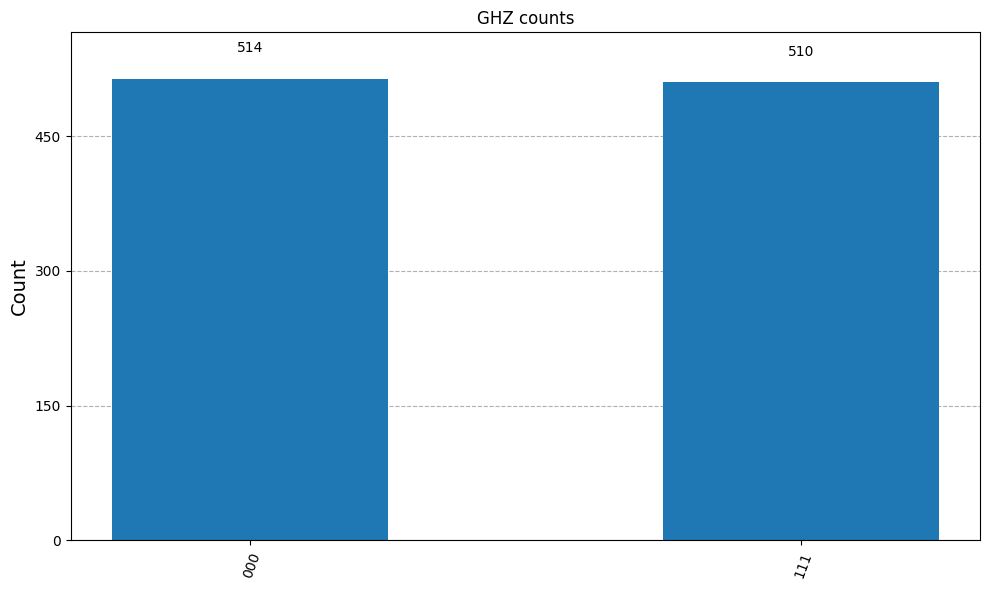

In [ ]:


# Build GHZ: (|000> + |111>)/√2
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0,1,2], [0,1,2])

sim = AerSimulator()
counts = sim.run(qc, shots=1024).result().get_counts()
print("GHZ counts:", counts)
fig = plot_histogram(counts, title="GHZ counts")
fig.savefig("Cubit_GHZ_State.png")
plt.close(fig)
display(fig)


# 2-Qubit Grover’s Search Demonstration


Grover counts: {'11': 1024}


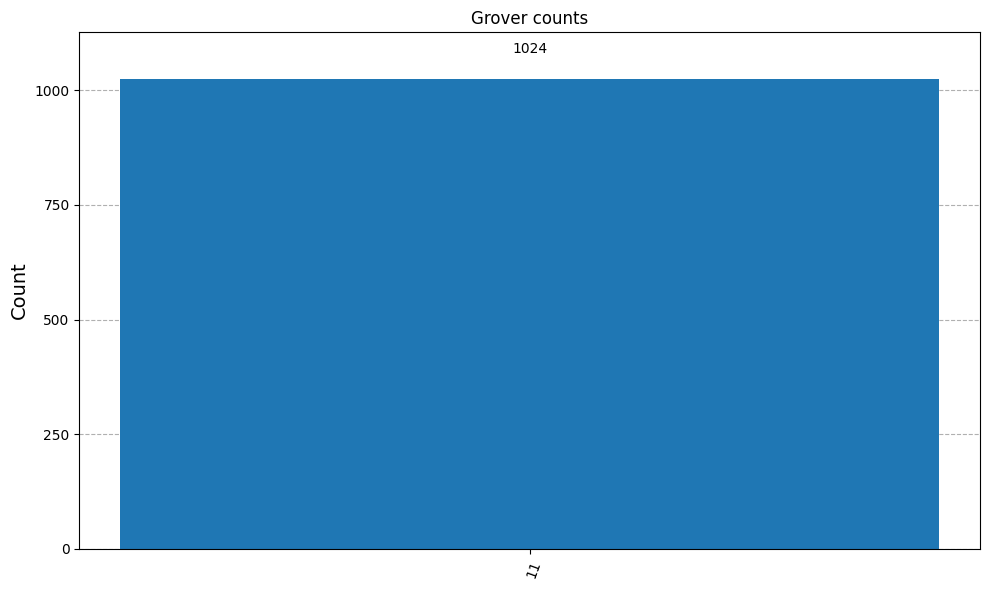

In [ ]:
# finds |11> in a 2-qubit space
from qiskit import QuantumCircuit

qc = QuantumCircuit(2,2)
# 1) init in uniform superposition
qc.h([0,1])
# 2) phase-flip oracle for |11>
qc.cz(0,1)
# 3) diffusion
qc.h([0,1]); qc.x([0,1])
qc.h(1); qc.cx(0,1); qc.h(1)
qc.x([0,1]); qc.h([0,1])
# 4) measure
qc.measure([0,1],[0,1])

sim = AerSimulator()
counts = sim.run(qc, shots=1024).result().get_counts()
print("Grover counts:", counts)
fig = plot_histogram(counts, title="Grover counts")
fig.savefig("Grovers_Search.png")
plt.close(fig)
display(fig)


# 2-Qubit Quantum Fourier Transform (QFT)


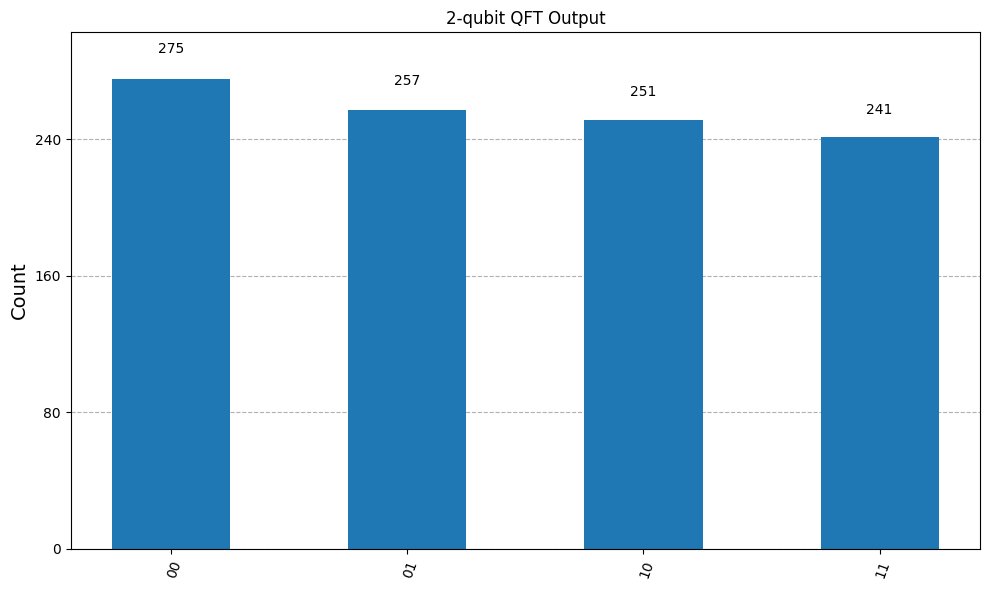

In [ ]:
def qft(circ, n):
    for i in range(n):
        circ.h(i)
        for j in range(i+1, n):
            circ.cp(2*3.14/2**(j-i+1), j, i)
    # swap qubits
    for i in range(n//2):
        circ.swap(i, n-1-i)

qc = QuantumCircuit(2, 2)
# prepare |01>
qc.x(0)
# apply QFT
qft(qc, 2)
qc.measure([0,1],[0,1])

sim = AerSimulator()
counts = sim.run(qc, shots=1024).result().get_counts()
# Plot & display
fig = plot_histogram(counts, title="2-qubit QFT Output")
fig.savefig("qft_histogram.png")
plt.close(fig)
display(fig)
